In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

0.002
R-squared1 SGD: 0.7940875512631511
Mean squared error1: 0.01


0.004
R-squared1 SGD: 0.7937249766294342
Mean squared error1: 0.01


0.006
R-squared1 SGD: 0.7941839865058884
Mean squared error1: 0.01


0.008
R-squared1 SGD: 0.7935371926232421
Mean squared error1: 0.01


0.01
R-squared1 SGD: 0.7927805806563554
Mean squared error1: 0.01


0.012
R-squared1 SGD: 0.7932287258514383
Mean squared error1: 0.01


0.014
R-squared1 SGD: 0.7926434721379849
Mean squared error1: 0.01


0.016
R-squared1 SGD: 0.793220157228421
Mean squared error1: 0.01


0.018000000000000002
R-squared1 SGD: 0.7930768742948804
Mean squared error1: 0.01


0.02
R-squared1 SGD: 0.7934979965536584
Mean squared error1: 0.01




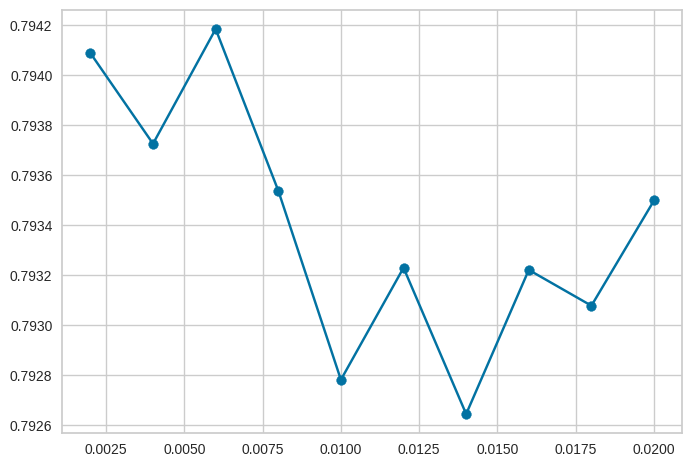

0.7941839865058884


In [68]:
#1
data = pd.read_csv("Admission_Prediction.csv")
#print(data)
#exp1.1
X = data[["TOEFL Score", "GRE Score", "CGPA"]]
Y = data["Chance_of_Admit"]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.15, random_state=4)

#exp1.2
xalpha = []
yr = []
for i in range(2,21,2):

  sgd_model = SGDRegressor(alpha= 0.001*(i) , max_iter=10000, tol=1e-5)
  sgd_model.fit(X_train, y_train)
  y_pre = sgd_model.predict(X_test)
  sgd_score = sgd_model.score(X_train, y_train)
  print(0.001*i)
  print("R-squared1 SGD:", sgd_score)
  print("Mean squared error1: %.2f" % mean_squared_error( y_test, y_pre) )
  print("\n")
  xalpha.append(0.001*i)
  yr.append(sgd_score)
plt.scatter(xalpha, yr)
plt.plot(xalpha, yr)
plt.show()

print(max(yr))

In [108]:
#exp1.3
sgd_model = SGDRegressor(alpha= 0.012 , max_iter=10000, tol=1e-5)
sgd_model.fit(X_train, y_train)
y_pre = sgd_model.predict(X_test)
sgd_score = sgd_model.score(X_train, y_train)
print("R-squared SGD:", sgd_score)
print("Mean squared error: %.2f" % mean_squared_error( y_test, y_pre) )
print("\n")
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_normalized, Y)
print(lr_model.score(X_normalized,Y))
print(lr_model.predict(X_test))
print(lr_model.intercept_,lr_model.coef_.reshape(-1,1))

R-squared SGD: 0.3074692806441073
Mean squared error: 0.16


0.7838541666666666
[1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0]
[-0.86678294] [[ 0.40864687]
 [ 1.10711197]
 [-0.25086804]
 [ 0.00905046]
 [-0.13083627]
 [ 0.69630872]
 [ 0.30883724]
 [ 0.17649782]]


In [70]:
#2
#exp2.1
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("diabetes.csv")
print(df)
X = df[["BMI", "Glucose", "Insulin"]]
Y = df["Outcome"]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=4)

lr_model = LogisticRegression()
lr_model.fit(X, Y)

y_pred = lr_model.predict(X_train)
y_pred_prob = lr_model.predict_proba(X)

lr_params = {'max_iter': range(10, 100, 10) ,'solver': ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],  'penalty': ['l1','l2','elasticnet', None], 'multi_class':['auto','ovr','multinomial']}
acc = []
for i in range(5,36,5):
  grid_model = GridSearchCV(lr_model, lr_params, cv= i, scoring='accuracy')
  grid_model.fit(X_train, y_train)
  accuracy = accuracy_score(y_train, y_pred)
  acc.append(f'number_CV : {i} \n CV accuracy : {grid_model.best_score_*100} % \n Best Parameters: {grid_model.best_params_}')

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Streaming output truncated to the last 5000 lines.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_mo

In [46]:
#2.2-#2.3
for j in acc:
  print(j, "\n")

print("ther best cv: is 5")

number_CV : 5 
 CV accuracy : 75.40050646408103 % 
 Best Parameters: {'max_iter': 10, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cholesky'} 

number_CV : 10 
 CV accuracy : 74.89423585404549 % 
 Best Parameters: {'max_iter': 20, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'} 

number_CV : 15 
 CV accuracy : 74.91056910569107 % 
 Best Parameters: {'max_iter': 10, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'} 

number_CV : 20 
 CV accuracy : 74.90860215053763 % 
 Best Parameters: {'max_iter': 20, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'} 

number_CV : 25 
 CV accuracy : 75.19999999999999 % 
 Best Parameters: {'max_iter': 10, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'} 

number_CV : 30 
 CV accuracy : 75.02380952380949 % 
 Best Parameters: {'max_iter': 30, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'} 

number_CV : 35 
 CV accuracy : 74.85527544351075 % 
 Best Parameters: {'max_iter':

79.87012987012987 

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       112
           1       0.60      0.76      0.67        42

    accuracy                           0.80       154
   macro avg       0.75      0.79      0.76       154
weighted avg       0.82      0.80      0.81       154



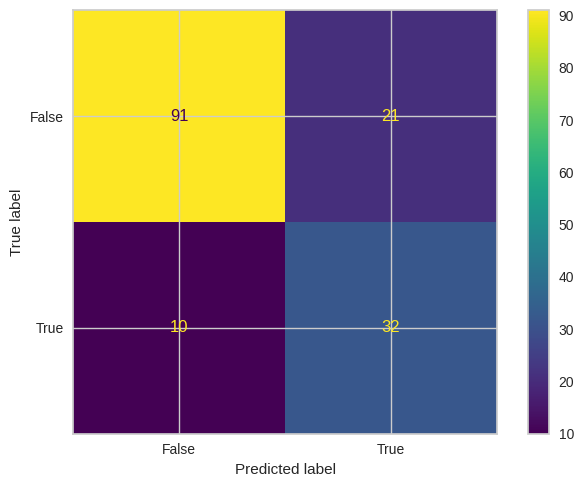

In [76]:
#exp2.4
y_pred = lr_model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print(ac*100,'\n')

from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

confusion_matrix = metrics.confusion_matrix(y_pred, y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [112]:
#exp2.5
from sklearn.linear_model import LogisticRegression

print(lr_model.score(X_normalized, Y))
print(lr_model.predict(X_test))
print(lr_model.intercept_,lr_model.coef_.reshape(-1,1))

0.7838541666666666
[1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0]
[-0.86678294] [[ 0.40864687]
 [ 1.10711197]
 [-0.25086804]
 [ 0.00905046]
 [-0.13083627]
 [ 0.69630872]
 [ 0.30883724]
 [ 0.17649782]]


In [92]:
#3
#3.1
data = pd.read_csv("diabetes.csv")
y = data["Outcome"].values
x = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].values

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(x)

#3.2
train_ac = []
test_ac = []
for i in range (50, 501, 50):
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.15, random_state= i)
  from sklearn.neighbors import KNeighborsClassifier
  knn_model= KNeighborsClassifier(n_neighbors=3)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_normalized)
  from sklearn import metrics
  print(i)
  Y_train = knn_model.predict(X_train)
  from sklearn.metrics import accuracy_score
  ac = accuracy_score(y_train, Y_train)
  train_ac.append(ac)
  print(f"Train:{ac}")
  Y_test = knn_model.predict(X_test)
  from sklearn.metrics import accuracy_score
  ac = accuracy_score(y_test, Y_test)
  test_ac.append(ac)
  print(f"Test:{ac}\n")


50
Train:0.8542944785276073
Test:0.7327586206896551

100
Train:0.8742331288343558
Test:0.6982758620689655

150
Train:0.8604294478527608
Test:0.6982758620689655

200
Train:0.848159509202454
Test:0.7672413793103449

250
Train:0.8512269938650306
Test:0.7672413793103449

300
Train:0.8512269938650306
Test:0.7068965517241379

350
Train:0.8496932515337423
Test:0.7413793103448276

400
Train:0.8542944785276073
Test:0.7586206896551724

450
Train:0.8696319018404908
Test:0.6810344827586207

500
Train:0.8512269938650306
Test:0.75



In [89]:
print(max(train_ac))
print(max(test_ac))

0.8742331288343558
0.7672413793103449


In [99]:
#3.3
knn = KNeighborsClassifier()

for range_k in range(50, 501,50):

    knn_params = {'n_neighbors': [range_k] ,'weights': ["uniform", "distance"],  'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}
    grid_model = GridSearchCV(knn, knn_params, cv=10, scoring='accuracy')
    grid_model.fit(X_train, y_train)
    print('Cross-Validated accuracy : ', grid_model.best_score_*100, '%',
    ',Best K-value : ', grid_model.best_params_)

y_pred = grid_model.predict(X_train)
print(metrics.classification_report(y_train, Y_train))

Cross-Validated accuracy :  75.006993006993 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 50, 'weights': 'distance'}
Cross-Validated accuracy :  74.23076923076923 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 100, 'weights': 'distance'}
Cross-Validated accuracy :  71.46153846153847 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 150, 'weights': 'distance'}
Cross-Validated accuracy :  70.08624708624708 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 200, 'weights': 'distance'}
Cross-Validated accuracy :  68.40093240093242 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 250, 'weights': 'distance'}
Cross-Validated accuracy :  66.55944055944056 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 300, 'weights': 'distance'}
Cross-Validated accuracy :  65.33566433566435 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 350, 'weights': 'distance'}
Cross-Validated accuracy :  64.72261072261072 % ,Best K-va

In [98]:
#3.4
knn = KNeighborsClassifier()

for range_k in range(50, 501,50):

    knn_params = {'n_neighbors': [range_k] ,'weights': ["uniform", "distance"],  'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}
    grid_model = GridSearchCV(knn, knn_params, cv=10, scoring='accuracy')
    grid_model.fit(X_train, y_train)
    print('Cross-Validated accuracy : ', grid_model.best_score_*100, '%',
    ',Best K-value : ', grid_model.best_params_)

y_pred = grid_model.predict(X_test)
print(metrics.classification_report(y_test, Y_test))


Cross-Validated accuracy :  75.006993006993 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 50, 'weights': 'distance'}
Cross-Validated accuracy :  74.23076923076923 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 100, 'weights': 'distance'}
Cross-Validated accuracy :  71.46153846153847 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 150, 'weights': 'distance'}
Cross-Validated accuracy :  70.08624708624708 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 200, 'weights': 'distance'}
Cross-Validated accuracy :  68.40093240093242 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 250, 'weights': 'distance'}
Cross-Validated accuracy :  66.55944055944056 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 300, 'weights': 'distance'}
Cross-Validated accuracy :  65.33566433566435 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 350, 'weights': 'distance'}
Cross-Validated accuracy :  64.72261072261072 % ,Best K-va

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        83
           1       0.55      0.64      0.59        33

    accuracy                           0.75       116
   macro avg       0.70      0.72      0.71       116
weighted avg       0.76      0.75      0.75       116



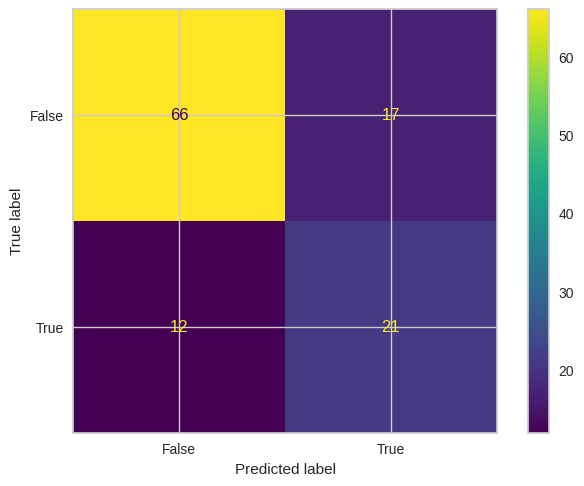

In [95]:
#3.5
from sklearn import metrics
print(metrics.classification_report(Y_test, y_test))

confusion_matrix = metrics.confusion_matrix(Y_test, y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()